In [1]:
# Data commands

# python download_data.py --project=feature_recycling-stationary_regression-hyper_search --sweeps o14vh5nd ap60d4yk j31qe0uk eocug0jv

In [2]:
import sys

sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from plotting_utils import *

sns.set_theme('notebook', 'white')
%matplotlib inline

## Load data


In [3]:
config_data_path = 'data/config_data.csv'
run_data_path = f'data/run_data.csv'
save_path = 'figures/'

raw_config_df = pd.read_csv(config_data_path, index_col=0)
raw_config_df['run_id'] = raw_config_df['id']
raw_run_df = pd.read_csv(run_data_path, index_col=0)

print('Config data:')
print(raw_config_df.columns)
display(raw_config_df.head())
print('Run data:')
print(raw_run_df.columns)
display(raw_run_df.head())


Config data:
Index(['name', 'id', 'sweep', 'idbd', 'seed', 'task', 'model', 'train',
       'wandb', 'device', 'project', 'task.n_layers', 'model.n_layers',
       'task.flip_rate', 'train.log_freq', 'task.n_features',
       'train.optimizer', 'model.hidden_dim', 'train.batch_size',
       'feature_recycling', 'task.weight_scale', 'train.total_steps',
       'train.learning_rate', 'task.n_real_features',
       'model.weight_init_method', 'feature_recycling.recycle_rate',
       'feature_recycling.use_cbp_utility',
       'feature_recycling.distractor_chance', 'run_id'],
      dtype='object')


,name,id,sweep,idbd,seed,task,model,train,wandb,device,...,feature_recycling,task.weight_scale,train.total_steps,train.learning_rate,task.n_real_features,model.weight_init_method,feature_recycling.recycle_rate,feature_recycling.use_cbp_utility,feature_recycling.distractor_chance,run_id
0,resilient-sweep-132,9wgutks7,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'sgd_momentum',...",True,cpu,...,"{'recycle_rate': 0, 'utility_decay': 0.99, 'us...",0.5,100000,${eval:2**-5},10,kaiming_uniform,0,False,0,9wgutks7
1,golden-sweep-131,2y84r7lc,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'adam', 'batch_...",True,cpu,...,"{'recycle_rate': 0, 'utility_decay': 0.99, 'us...",0.5,100000,${eval:2**-5},10,kaiming_uniform,0,False,0,2y84r7lc
2,ruby-sweep-130,1m4cgzpe,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'rmsprop', 'bat...",True,cpu,...,"{'recycle_rate': 0, 'utility_decay': 0.99, 'us...",0.5,100000,${eval:2**-5},10,kaiming_uniform,0,False,0,1m4cgzpe
3,light-sweep-129,cjiasjch,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'sgd', 'batch_s...",True,cpu,...,"{'recycle_rate': 0, 'utility_decay': 0.99, 'us...",0.5,100000,${eval:2**-5},10,kaiming_uniform,0,False,0,cjiasjch
4,zany-sweep-128,2v4jy6rd,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'sgd_momentum',...",True,cpu,...,"{'recycle_rate': 0, 'utility_decay': 0.99, 'us...",0.5,100000,${eval:2**-6},10,kaiming_uniform,0,False,0,2v4jy6rd


Run data:
Index(['layer_1/input_l1', 'step', 'samples', 'loss',
       'avg_lifespan_distractor', '_runtime', 'num_real_features',
       'avg_lifespan_real', 'mean_weight_norm_real', 'layer_0/weight_l1',
       'mean_weight_norm_distractor', 'total_recycled_features',
       'layer_1/bias_l1', 'cumulative_loss', 'layer_0/input_l1',
       'num_distractor_features', 'squared_targets', '_timestamp',
       'layer_1/weight_l1', 'accuracy', 'run_id',
       'mean_learning_rate_distractor', 'mean_learning_rate_real'],
      dtype='object')


,layer_1/input_l1,step,samples,loss,avg_lifespan_distractor,_runtime,num_real_features,avg_lifespan_real,mean_weight_norm_real,layer_0/weight_l1,...,cumulative_loss,layer_0/input_l1,num_distractor_features,squared_targets,_timestamp,layer_1/weight_l1,accuracy,run_id,mean_learning_rate_distractor,mean_learning_rate_real
0,0.724548,0,0,3.229672e-01,0,10.829563,10,0,3.881150e-01,3.881150e-01,...,3.229672e-01,0.913921,0,0.061618,1.736413e+09,6.672821e-02,NaN,9wgutks7,NaN,NaN
1,1.000000,100,100,1.859320e+35,0,10.990957,10,100,3.912445e+29,3.912445e+29,...,1.859320e+37,0.728615,0,2.466834,1.736413e+09,3.566544e+17,NaN,9wgutks7,NaN,NaN
2,NaN,200,200,NaN,0,11.134000,10,200,NaN,NaN,...,NaN,0.629933,0,2.523123,1.736413e+09,NaN,NaN,9wgutks7,NaN,NaN
3,NaN,300,300,NaN,0,11.305636,10,300,NaN,NaN,...,NaN,0.883944,0,2.197751,1.736413e+09,NaN,NaN,9wgutks7,NaN,NaN
4,NaN,400,400,NaN,0,11.455666,10,400,NaN,NaN,...,NaN,0.903636,0,2.269871,1.736413e+09,NaN,NaN,9wgutks7,NaN,NaN


In [4]:
# Rename sweeps
sweep_rename_dict = {
    'o14vh5nd': 'optimizer_and_step_size',
    'ap60d4yk': 'optimizer_and_step_size_non_linear',
    'j31qe0uk': 'distractors_linear',
    'eocug0jv': 'distractors_non_linear',
}

raw_config_df['sweep_name'] = raw_config_df['sweep'].map(sweep_rename_dict)

display(raw_config_df.head())

,name,id,sweep,idbd,seed,task,model,train,wandb,device,...,task.weight_scale,train.total_steps,train.learning_rate,task.n_real_features,model.weight_init_method,feature_recycling.recycle_rate,feature_recycling.use_cbp_utility,feature_recycling.distractor_chance,run_id,sweep_name
0,resilient-sweep-132,9wgutks7,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'sgd_momentum',...",True,cpu,...,0.5,100000,${eval:2**-5},10,kaiming_uniform,0,False,0,9wgutks7,optimizer_and_step_size
1,golden-sweep-131,2y84r7lc,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'adam', 'batch_...",True,cpu,...,0.5,100000,${eval:2**-5},10,kaiming_uniform,0,False,0,2y84r7lc,optimizer_and_step_size
2,ruby-sweep-130,1m4cgzpe,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'rmsprop', 'bat...",True,cpu,...,0.5,100000,${eval:2**-5},10,kaiming_uniform,0,False,0,1m4cgzpe,optimizer_and_step_size
3,light-sweep-129,cjiasjch,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'sgd', 'batch_s...",True,cpu,...,0.5,100000,${eval:2**-5},10,kaiming_uniform,0,False,0,cjiasjch,optimizer_and_step_size
4,zany-sweep-128,2v4jy6rd,o14vh5nd,"{'version': 'squared_inputs', 'meta_learning_r...",2,"{'name': 'nonlinear_geoff', 'type': 'regressio...","{'n_layers': 2, 'activation': 'tanh', 'hidden_...","{'log_freq': 100, 'optimizer': 'sgd_momentum',...",True,cpu,...,0.5,100000,${eval:2**-6},10,kaiming_uniform,0,False,0,2v4jy6rd,optimizer_and_step_size


## Task = Linear | Distractors = 0

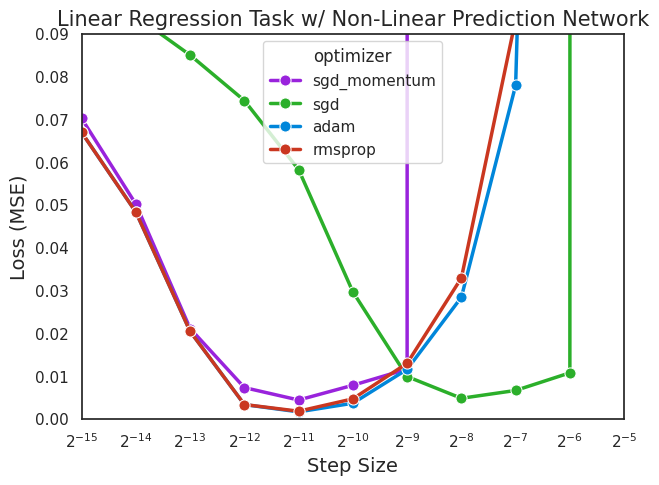

In [21]:
# Select only runs with baseline, full method, or no distractors baseline
plot_df = pd.merge(raw_run_df, raw_config_df[['run_id', 'sweep_name', 'train.optimizer', 'train.learning_rate']], on='run_id')
plot_df = plot_df[plot_df['sweep_name'] == 'optimizer_and_step_size']

min_step = plot_df['step'].min()
max_step = plot_df['step'].max()
cutoff_step = (max_step - min_step) * 0.9 + min_step

plot_df = plot_df[plot_df['step'] >= cutoff_step]
# Average loss over each run_id and fill NA values with 100
plot_df = plot_df.groupby(['run_id', 'train.optimizer', 'train.learning_rate'], as_index=False)['loss'].mean().fillna(100)

plot_df['step_size'] = plot_df['train.learning_rate'].apply(lambda x: 2 ** int(x[10:-1]))
plot_df['optimizer'] = plot_df['train.optimizer']
plt.figure(figsize=(7, 5))
# Create plot with both scatter and line in one go
g = sns.lineplot(
    data=plot_df, 
    x='step_size',
    y='loss',
    hue='optimizer',
    errorbar=None, #('ci', 95),
    marker='o',
    markersize=8,
    alpha=1.0,
    linewidth=2.5,
    palette=get_color_palette(plot_df['optimizer'].unique())
)
min_x_exp = round(np.log2(plot_df['step_size'].min()))
max_x_exp = round(np.log2(plot_df['step_size'].max()))

plt.xscale('log', base=2)
plt.xticks(
    [2**i for i in range(min_x_exp, max_x_exp+1)],
    [f'$2^{{{i}}}$' for i in range(min_x_exp, max_x_exp+1)]
)

plt.xlim(2**min_x_exp, 2**max_x_exp)
plt.ylim(0.0, 0.09)

plt.title('Linear Regression Task w/ Non-Linear Prediction Network', fontsize=15)
plt.xlabel('Step Size', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)

plt.show()

# Task = Non-Linear | Distractors = 0

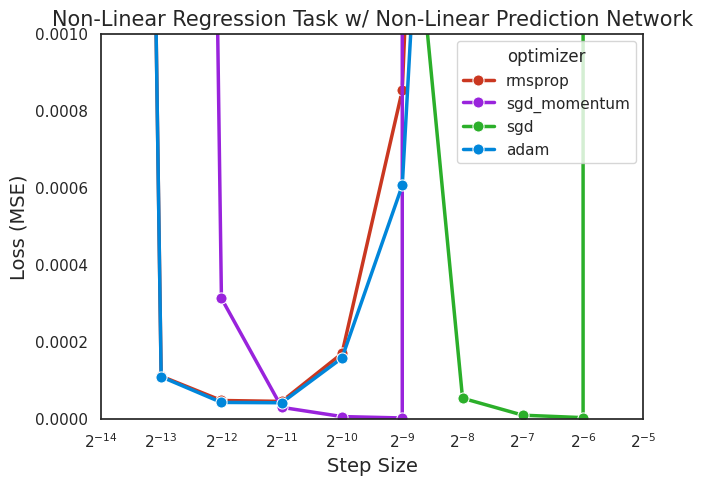

In [25]:
# Select only runs with baseline, full method, or no distractors baseline
plot_df = pd.merge(raw_run_df, raw_config_df[['run_id', 'sweep_name', 'train.optimizer', 'train.learning_rate']], on='run_id')
plot_df = plot_df[plot_df['sweep_name'] == 'optimizer_and_step_size_non_linear']

min_step = plot_df['step'].min()
max_step = plot_df['step'].max()
cutoff_step = (max_step - min_step) * 0.9 + min_step

plot_df = plot_df[plot_df['step'] >= cutoff_step]
# Average loss over each run_id and fill NA values with 100
plot_df = plot_df.groupby(['run_id', 'train.optimizer', 'train.learning_rate'], as_index=False)['loss'].mean().fillna(100)

plot_df['step_size'] = plot_df['train.learning_rate'].apply(lambda x: 2 ** int(x[10:-1]))
plot_df['optimizer'] = plot_df['train.optimizer']
plt.figure(figsize=(7, 5))
# Create plot with both scatter and line in one go
g = sns.lineplot(
    data=plot_df, 
    x='step_size',
    y='loss',
    hue='optimizer',
    errorbar=None, #('ci', 95),
    marker='o',
    markersize=8,
    alpha=1.0,
    linewidth=2.5,
    palette=get_color_palette(plot_df['optimizer'].unique())
)

min_x_exp = -14
max_x_exp = round(np.log2(plot_df['step_size'].max()))

plt.xscale('log', base=2)
plt.xticks(
    [2**i for i in range(min_x_exp, max_x_exp+1)],
    [f'$2^{{{i}}}$' for i in range(min_x_exp, max_x_exp+1)]
)

plt.xlim(2**min_x_exp, 2**max_x_exp)
plt.ylim(0.0, 0.001)

plt.title('Non-Linear Regression Task w/ Non-Linear Prediction Network', fontsize=15)
plt.xlabel('Step Size', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)

plt.show()

## Task = Linear | Distractors = 90

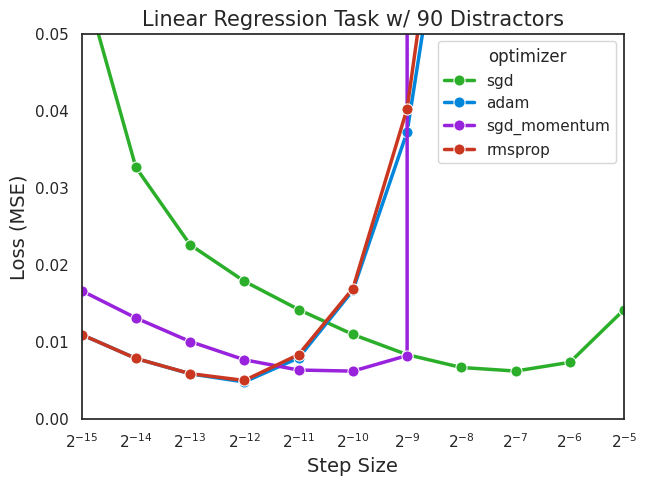

In [29]:
# Select only runs with baseline, full method, or no distractors baseline
plot_df = pd.merge(raw_run_df, raw_config_df[['run_id', 'sweep_name', 'train.optimizer', 'train.learning_rate']], on='run_id')
plot_df = plot_df[plot_df['sweep_name'] == 'distractors_linear']

min_step = plot_df['step'].min()
max_step = plot_df['step'].max()
cutoff_step = (max_step - min_step) * 0.9 + min_step

plot_df = plot_df[plot_df['step'] >= cutoff_step]
# Average loss over each run_id and fill NA values with 100
plot_df = plot_df.groupby(['run_id', 'train.optimizer', 'train.learning_rate'], as_index=False)['loss'].mean().fillna(100)

plot_df['step_size'] = plot_df['train.learning_rate'].apply(lambda x: 2 ** int(x[10:-1]))
plot_df['optimizer'] = plot_df['train.optimizer']
plt.figure(figsize=(7, 5))
# Create plot with both scatter and line in one go
g = sns.lineplot(
    data=plot_df, 
    x='step_size',
    y='loss',
    hue='optimizer',
    errorbar=None, #('ci', 95),
    marker='o',
    markersize=8,
    alpha=1.0,
    linewidth=2.5,
    palette=get_color_palette(plot_df['optimizer'].unique())
)

min_x_exp = round(np.log2(plot_df['step_size'].min()))
max_x_exp = round(np.log2(plot_df['step_size'].max()))

plt.xscale('log', base=2)
plt.xticks(
    [2**i for i in range(min_x_exp, max_x_exp+1)],
    [f'$2^{{{i}}}$' for i in range(min_x_exp, max_x_exp+1)]
)

plt.xlim(2**min_x_exp, 2**max_x_exp)
plt.ylim(0.0, 0.05)

plt.title('Linear Regression Task w/ 90 Distractors', fontsize=15)
plt.xlabel('Step Size', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)

plt.show()

## Task = Non-Linear | Distractors = 90

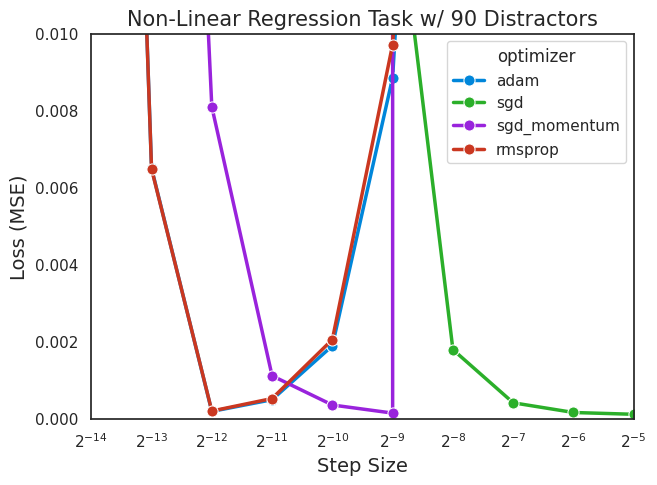

In [32]:
# Select only runs with baseline, full method, or no distractors baseline
plot_df = pd.merge(raw_run_df, raw_config_df[['run_id', 'sweep_name', 'train.optimizer', 'train.learning_rate']], on='run_id')
plot_df = plot_df[plot_df['sweep_name'] == 'distractors_non_linear']

min_step = plot_df['step'].min()
max_step = plot_df['step'].max()
cutoff_step = (max_step - min_step) * 0.9 + min_step

plot_df = plot_df[plot_df['step'] >= cutoff_step]
# Average loss over each run_id and fill NA values with 100
plot_df = plot_df.groupby(['run_id', 'train.optimizer', 'train.learning_rate'], as_index=False)['loss'].mean().fillna(100)

plot_df['step_size'] = plot_df['train.learning_rate'].apply(lambda x: 2 ** int(x[10:-1]))
plot_df['optimizer'] = plot_df['train.optimizer']
plt.figure(figsize=(7, 5))
# Create plot with both scatter and line in one go
g = sns.lineplot(
    data=plot_df, 
    x='step_size',
    y='loss',
    hue='optimizer',
    errorbar=None, #('ci', 95),
    marker='o',
    markersize=8,
    alpha=1.0,
    linewidth=2.5,
    palette=get_color_palette(plot_df['optimizer'].unique())
)

min_x_exp = -14
max_x_exp = round(np.log2(plot_df['step_size'].max()))

plt.xscale('log', base=2)
plt.xticks(
    [2**i for i in range(min_x_exp, max_x_exp+1)],
    [f'$2^{{{i}}}$' for i in range(min_x_exp, max_x_exp+1)]
)

plt.xlim(2**min_x_exp, 2**max_x_exp)
plt.ylim(0.0, 0.01)

plt.title('Non-Linear Regression Task w/ 90 Distractors', fontsize=15)
plt.xlabel('Step Size', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)

plt.show()